# <font color = "red">Classificação de Risco de Crédito</font>

## Análise Exploratória dos Dados e Engenharia de Atributos

<font color = "red">Problema de Negócio:</font> A partir de dados históricos, irei verificar os padrões que levaram os clientes de uma instituição financeira, a adentrarem, ou não, na situação de inadimplência, para posteriormente criar um 

<font color = "red">Meta de Acurácia Final:</font> ACC mínimo de 88%

<font color = "blue">Nesta etapa, iniciarei a análise minuciosa dos dados, com objetivo de identificar padrões, além de aplicar a engenharia de atributos para melhor formatar o conjunto de dados

In [58]:
# Imports 
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sys.path.append(os.path.abspath('..'))
from utils import *

# <font color = "GREEN"> DECISÕES TOMADAS </font>

##### <font color = "GREEN">Outliers</font>
- Renda, Idade e Anos no Emprego possuem outliers extremamentes fortes. farei o tratamento disso:
  - Realizei o primeiro tratamento de outliers, 2 variáveis estão sem, outras estão com outliers ainda, pois estão bem próximos ao limíte
- Taxa_Juros possui poucos outliers, irei excluí-los, para então imputar valor médio em seus dados ausentes

##### <font color = "GREEN">Valores Ausentes</font>
- Apaguei todos os 895 registros onde Anos_no_emprego são iguais a NA



In [86]:
# Importando os dados 
df = pd.read_csv("C:/Projetos Pessoais/DataScience/analise_Risco_Credito/data/dados_mapeados2.csv")

In [87]:
df.sample(5)

,Idade,Renda_Anual,Tipo_Moradia,Anos_no_Emprego,Motivo_Emprestimo,Grau_Emprestimo,Valor,Taxa_Juros,Status_Pagamento,Comprometimento_Renda,Inadimplencia_Historica,Duracao_Historico_Credito
22025,30.0,51750.0,Próprio,5.0,Empreendimento,B,12000.0,11.14,0,0.23,Não,10.0
21586,35.0,43000.0,Hipoteca,7.0,Consolidação Dívidas,D,13200.0,16.77,1,0.31,Sim,9.0
31580,44.0,109000.0,Hipoteca,17.0,Médico,C,12800.0,13.79,0,0.12,Sim,12.0
3999,22.0,39996.0,Próprio,5.0,Educação,C,3500.0,NaN,0,0.09,Não,2.0
21409,28.0,42000.0,Hipoteca,NaN,Consolidação Dívidas,D,7600.0,16.29,1,0.18,Não,7.0


In [88]:
# transformando a classe alvo em object
df['Status_Pagamento'] = df['Status_Pagamento'].astype("object")

In [89]:
df.shape

(32581, 12)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Idade                      32581 non-null  float64
 1   Renda_Anual                32581 non-null  float64
 2   Tipo_Moradia               32581 non-null  object 
 3   Anos_no_Emprego            31686 non-null  float64
 4   Motivo_Emprestimo          32581 non-null  object 
 5   Grau_Emprestimo            32581 non-null  object 
 6   Valor                      32581 non-null  float64
 7   Taxa_Juros                 29465 non-null  float64
 8   Status_Pagamento           32581 non-null  object 
 9   Comprometimento_Renda      32581 non-null  float64
 10  Inadimplencia_Historica    32581 non-null  object 
 11  Duracao_Historico_Credito  32581 non-null  float64
dtypes: float64(7), object(5)
memory usage: 3.0+ MB


In [91]:
df.describe()

,Idade,Renda_Anual,Anos_no_Emprego,Valor,Taxa_Juros,Comprometimento_Renda,Duracao_Historico_Credito
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


In [92]:
# Verificando valores ausentes

df.isna().sum()

Idade                           0
Renda_Anual                     0
Tipo_Moradia                    0
Anos_no_Emprego               895
Motivo_Emprestimo               0
Grau_Emprestimo                 0
Valor                           0
Taxa_Juros                   3116
Status_Pagamento                0
Comprometimento_Renda           0
Inadimplencia_Historica         0
Duracao_Historico_Credito       0
dtype: int64

In [98]:
# Removendo valores NaN - Apenas Anos_no_Emprego 
df.dropna(subset=['Anos_no_Emprego'], inplace=True)


In [99]:
df.isna().sum()

Idade                           0
Renda_Anual                     0
Tipo_Moradia                    0
Anos_no_Emprego                 0
Motivo_Emprestimo               0
Grau_Emprestimo                 0
Valor                           0
Taxa_Juros                   3048
Status_Pagamento                0
Comprometimento_Renda           0
Inadimplencia_Historica         0
Duracao_Historico_Credito       0
dtype: int64

### <font color = "red">Iniciando Tratamento de Outliers

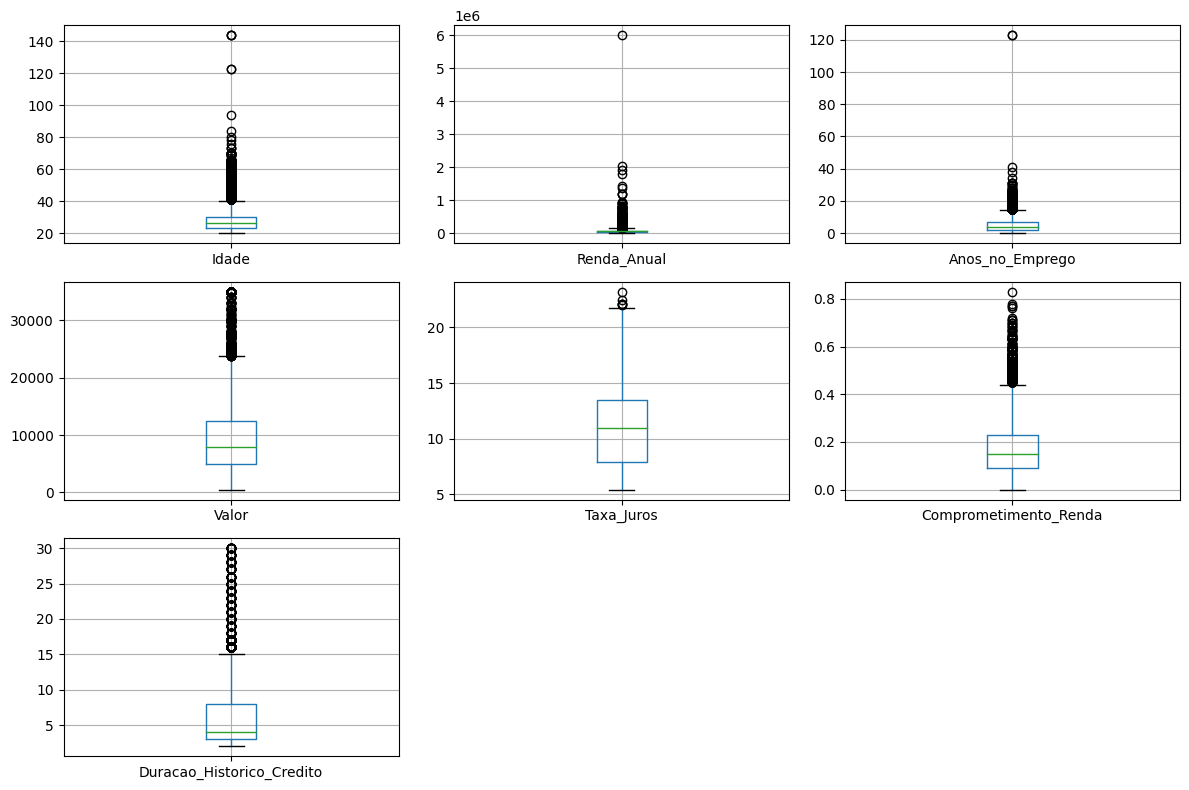

In [100]:
# Outliers das variáveis numéricas 
# Plot das variáveis contínuas 
variaveis_numericas = ['Idade','Renda_Anual','Anos_no_Emprego',
                       'Valor','Taxa_Juros','Comprometimento_Renda',
                       'Duracao_Historico_Credito']

# tamanho da área de plotagem 
fig = plt.figure(figsize= (12,8))

# Loop pelas variáveis contínuas 
for i, col in enumerate(variaveis_numericas):
 plt.subplot(3, 3, i + 1);
 df.boxplot(col)
 plt.tight_layout()

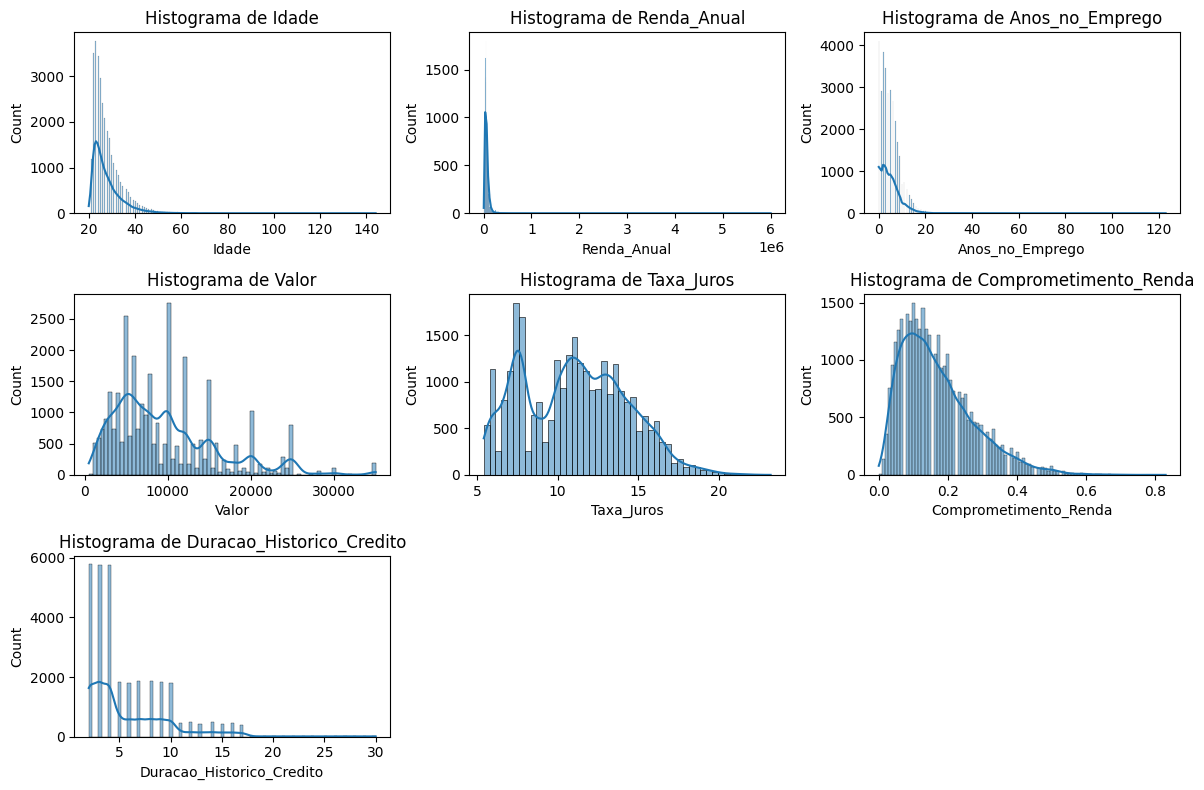

In [101]:
# Loop pelas variáveis contínuas 
fig = plt.figure(figsize= (12, 8))

# Loop pelas variáveis numéricas e plotar histograma
for i, col in enumerate(variaveis_numericas):
    plt.subplot(3, 3, i + 1)  # Criar subplots (3 linhas x 3 colunas)
    plt.title(f'Histograma de {col}')  # Título para cada gráfico
    sns.histplot(df[col], kde=True)  # Histograma com curva KDE
    plt.tight_layout()  # Ajustar o layout para não sobrepor os gráficos

plt.show()

In [104]:
# Detectando outliers utilizano IQR

def detecta_outliers(data, coluna):
 Q1 = np.quantile(data[coluna],0.25)
 Q3 = np.quantile(data[coluna],0.75)
 
 IQR = Q3 - Q1

 # lower_bound = Q1-1.5*IQR - Usaria isso apenas se tivesse outliers abaixo dos 25% 
 upper_bound = Q3+1.5*IQR

 outliers = data[(data[coluna] > upper_bound)]

 return outliers

In [120]:
df_teste2 = df.copy()
df_teste2.shape

# Colocando nova coluna "ID" para posterior comparação e eliminnação de linhas
df_teste2['ID'] = range(1, len(df_teste2) + 1)

In [139]:
df_teste2

,Idade,Renda_Anual,Tipo_Moradia,Anos_no_Emprego,Motivo_Emprestimo,Grau_Emprestimo,Valor,Taxa_Juros,Status_Pagamento,Comprometimento_Renda,Inadimplencia_Historica,Duracao_Historico_Credito,ID
0,22.0,59000.0,Aluguel,123.0,Pessoal,D,35000.0,16.02,1,0.59,Sim,3.0,1
1,21.0,9600.0,Próprio,5.0,Educação,B,1000.0,11.14,0,0.10,Não,2.0,2
2,25.0,9600.0,Hipoteca,1.0,Médico,C,5500.0,12.87,1,0.57,Não,3.0,3
3,23.0,65500.0,Aluguel,4.0,Médico,C,35000.0,15.23,1,0.53,Não,2.0,4
4,24.0,54400.0,Aluguel,8.0,Médico,C,35000.0,14.27,1,0.55,Sim,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57.0,53000.0,Hipoteca,1.0,Pessoal,C,5800.0,13.16,0,0.11,Não,30.0,31682
32577,54.0,120000.0,Hipoteca,4.0,Pessoal,A,17625.0,7.49,0,0.15,Não,19.0,31683
32578,65.0,76000.0,Aluguel,3.0,Reformas Domésticas,B,35000.0,10.99,1,0.46,Não,28.0,31684
32579,56.0,150000.0,Hipoteca,5.0,Pessoal,B,15000.0,11.48,0,0.10,Não,26.0,31685


In [156]:
# Função para detecção e eliminação dos Outliers
df_sem_outlier_final = df_teste2


for variavel in variaveis_numericas:
 
 outlier = detecta_outliers(df_sem_outlier_final,variavel)
 print(f"{df_sem_outlier_final.shape} - antes da variavel {variavel}, que possui {outlier.shape}")

 df_sem_outlier_final = df_sem_outlier_final[~df_sem_outlier_final['ID'].isin(outlier['ID'])]



(31686, 13) - antes da variavel Idade, que possui (1460, 13)
(30226, 13) - antes da variavel Renda_Anual, que possui (1337, 13)
(28889, 13) - antes da variavel Anos_no_Emprego, que possui (620, 13)
(28269, 13) - antes da variavel Valor, que possui (1229, 13)
(27040, 13) - antes da variavel Taxa_Juros, que possui (0, 13)
(27040, 13) - antes da variavel Comprometimento_Renda, que possui (682, 13)
(26358, 13) - antes da variavel Duracao_Historico_Credito, que possui (840, 13)


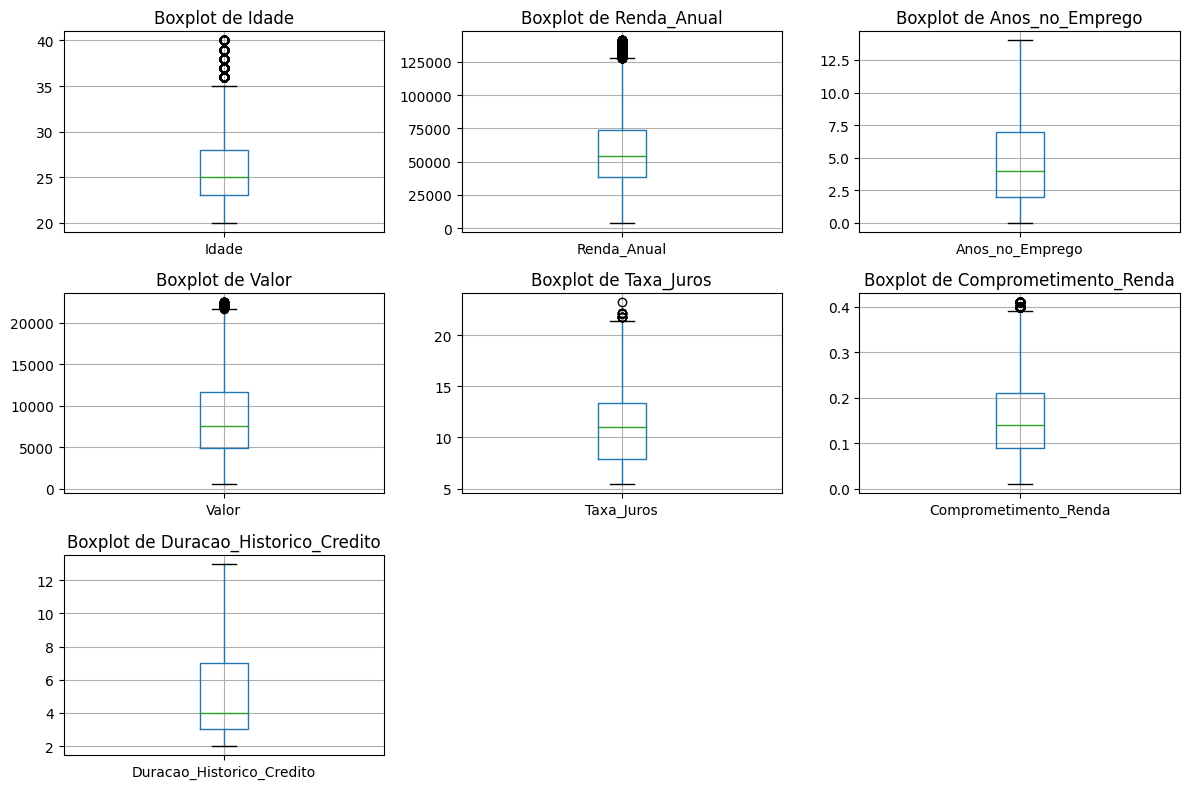

In [157]:
fig = plt.figure(figsize= (12,8))

# Loop pelas variáveis contínuas 
# for i, col in enumerate(variaveis_numericas):
#  plt.subplot(3, 3, i + 1);
#  df.boxplot(df_sem_outliers[col])
#  plt.tight_layout()

for i, col in enumerate(variaveis_numericas):
    plt.subplot(3, 3, i + 1)
    df_sem_outlier_final.boxplot(column=col)  # Gerando boxplot para cada coluna
    plt.title(f'Boxplot de {col}')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de gráficos
plt.show()

In [158]:
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Idade'] <= 35]


In [160]:
df_sem_outlier_final[df_sem_outlier_final['Idade'] <= 35]

,Idade,Renda_Anual,Tipo_Moradia,Anos_no_Emprego,Motivo_Emprestimo,Grau_Emprestimo,Valor,Taxa_Juros,Status_Pagamento,Comprometimento_Renda,Inadimplencia_Historica,Duracao_Historico_Credito,ID
1,21.0,9600.0,Próprio,5.0,Educação,B,1000.0,11.14,0,0.10,Não,2.0,2
5,21.0,9900.0,Próprio,2.0,Empreendimento,A,2500.0,7.14,1,0.25,Não,2.0,6
9,21.0,10000.0,Próprio,6.0,Empreendimento,D,1600.0,14.74,1,0.16,Não,3.0,10
19,24.0,10800.0,Hipoteca,8.0,Educação,B,1750.0,10.99,1,0.16,Não,2.0,20
23,24.0,10980.0,Próprio,0.0,Pessoal,A,1500.0,7.29,0,0.14,Não,3.0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29114,31.0,83000.0,Hipoteca,9.0,Empreendimento,F,18000.0,19.74,1,0.22,Sim,8.0,28308
29115,29.0,61656.0,Aluguel,4.0,Pessoal,A,15000.0,6.91,0,0.24,Não,9.0,28309
29116,32.0,30000.0,Aluguel,1.0,Educação,B,11450.0,9.99,1,0.38,Não,6.0,28310
29117,31.0,26010.0,Hipoteca,2.0,Pessoal,B,6500.0,9.99,0,0.25,Não,9.0,28311


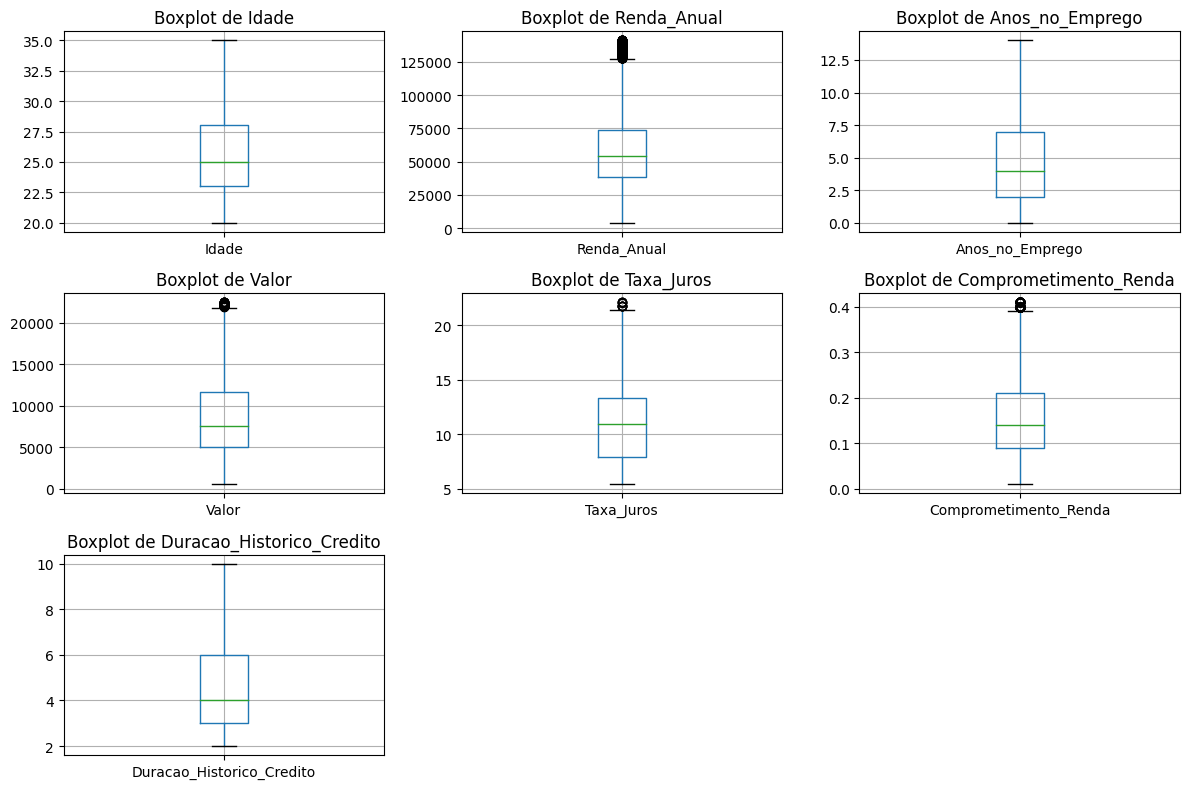

In [161]:
fig = plt.figure(figsize= (12,8))

# Loop pelas variáveis contínuas 
# for i, col in enumerate(variaveis_numericas):
#  plt.subplot(3, 3, i + 1);
#  df.boxplot(df_sem_outliers[col])
#  plt.tight_layout()

for i, col in enumerate(variaveis_numericas):
    plt.subplot(3, 3, i + 1)
    df_sem_outlier_final.boxplot(column=col)  # Gerando boxplot para cada coluna
    plt.title(f'Boxplot de {col}')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de gráficos
plt.show()

In [165]:
def detecta_outliers_ajuste_fino(data, coluna):
 Q1 = np.quantile(data[coluna],0.25)
 Q3 = np.quantile(data[coluna],0.75)
 
 IQR = Q3 - Q1

 # lower_bound = Q1-1.5*IQR - Usaria isso apenas se tivesse outliers abaixo dos 25% 
 upper_bound = Q3+1.5*IQR

 return upper_bound

In [ ]:
detecta_outliers_ajuste_fino(df_sem_outlier_final, 'Renda')

In [166]:
for variavel in variaveis_numericas:
 
 print(f"Límite superior da variável {variavel} é {detecta_outliers_ajuste_fino(df_sem_outlier_final,variavel)}")


Límite superior da variável Idade é 35.5
Límite superior da variável Renda_Anual é 127400.0
Límite superior da variável Anos_no_Emprego é 14.5
Límite superior da variável Valor é 21825.0
Límite superior da variável Taxa_Juros é nan
Límite superior da variável Comprometimento_Renda é 0.39
Límite superior da variável Duracao_Historico_Credito é 10.5


In [169]:
# Ajustando fino todos os limites superiores

In [167]:
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Renda_Anual'] <= 127400.0]
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Anos_no_Emprego'] <= 14.5]
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Valor'] <= 21825.0]
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Comprometimento_Renda'] <= 0.39]
df_sem_outlier_final = df_sem_outlier_final[df_sem_outlier_final['Duracao_Historico_Credito'] <= 10.5]

In [168]:
df_sem_outlier_final.shape

(24181, 13)

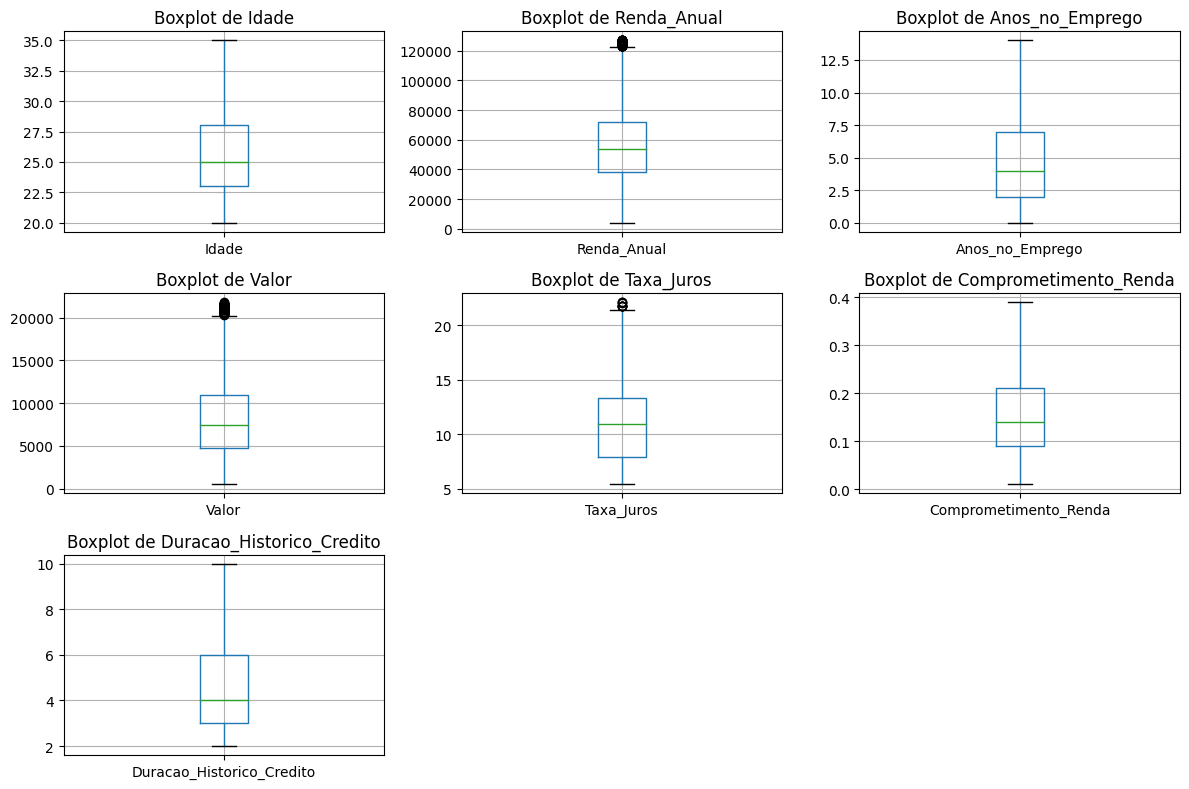

In [170]:
fig = plt.figure(figsize= (12,8))

for i, col in enumerate(variaveis_numericas):
    plt.subplot(3, 3, i + 1)
    df_sem_outlier_final.boxplot(column=col)  # Gerando boxplot para cada coluna
    plt.title(f'Boxplot de {col}')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de gráficos
plt.show()

In [133]:
outlier_teste_idade = detecta_outliers(outlier_teste_idade,'Renda_Anual')

In [134]:
outlier_teste_idade

,Idade,Renda_Anual,Tipo_Moradia,Anos_no_Emprego,Motivo_Emprestimo,Grau_Emprestimo,Valor,Taxa_Juros,Status_Pagamento,Comprometimento_Renda,Inadimplencia_Historica,Duracao_Historico_Credito,ID
81,144.0,250000.0,Aluguel,4.0,Empreendimento,C,4800.0,13.57,0,0.02,Não,3.0,82
183,144.0,200000.0,Hipoteca,4.0,Educação,B,6000.0,11.86,0,0.03,Não,2.0,183
29121,50.0,900000.0,Hipoteca,11.0,Consolidação Dívidas,B,30000.0,12.69,0,0.03,Não,15.0,28315
29127,44.0,584800.0,Hipoteca,4.0,Médico,C,20000.0,NaN,1,0.03,Sim,16.0,28321
29131,43.0,500000.0,Hipoteca,5.0,Empreendimento,C,25000.0,12.61,0,0.05,Sim,14.0,28325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32543,52.0,720000.0,Hipoteca,1.0,Pessoal,A,7925.0,8.94,0,0.01,Não,30.0,31649
32544,58.0,780000.0,Hipoteca,7.0,Pessoal,A,4500.0,6.91,0,0.01,Não,20.0,31650
32546,60.0,1900000.0,Hipoteca,5.0,Pessoal,A,1500.0,NaN,0,0.00,Não,21.0,31652
32551,58.0,780000.0,Hipoteca,7.0,Pessoal,A,4500.0,6.91,0,0.01,Não,19.0,31657


In [126]:
df_teste2_sem_outliers = df_teste2[~df_teste2['ID'].isin(outlier_teste_idade['ID'])]

In [135]:
df_teste2_sem_outliers_IDADE = df_teste2[~df_teste2['ID'].isin(outlier_teste_idade['ID'])]

In [136]:
df_teste2_sem_outliers

,Idade,Renda_Anual,Tipo_Moradia,Anos_no_Emprego,Motivo_Emprestimo,Grau_Emprestimo,Valor,Taxa_Juros,Status_Pagamento,Comprometimento_Renda,Inadimplencia_Historica,Duracao_Historico_Credito,ID
0,22.0,59000.0,Aluguel,123.0,Pessoal,D,35000.0,16.02,1,0.59,Sim,3.0,1
1,21.0,9600.0,Próprio,5.0,Educação,B,1000.0,11.14,0,0.10,Não,2.0,2
2,25.0,9600.0,Hipoteca,1.0,Médico,C,5500.0,12.87,1,0.57,Não,3.0,3
3,23.0,65500.0,Aluguel,4.0,Médico,C,35000.0,15.23,1,0.53,Não,2.0,4
4,24.0,54400.0,Aluguel,8.0,Médico,C,35000.0,14.27,1,0.55,Sim,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52.0,64500.0,Aluguel,0.0,Educação,B,5000.0,11.26,0,0.08,Não,20.0,31681
32576,57.0,53000.0,Hipoteca,1.0,Pessoal,C,5800.0,13.16,0,0.11,Não,30.0,31682
32577,54.0,120000.0,Hipoteca,4.0,Pessoal,A,17625.0,7.49,0,0.15,Não,19.0,31683
32578,65.0,76000.0,Aluguel,3.0,Reformas Domésticas,B,35000.0,10.99,1,0.46,Não,28.0,31684


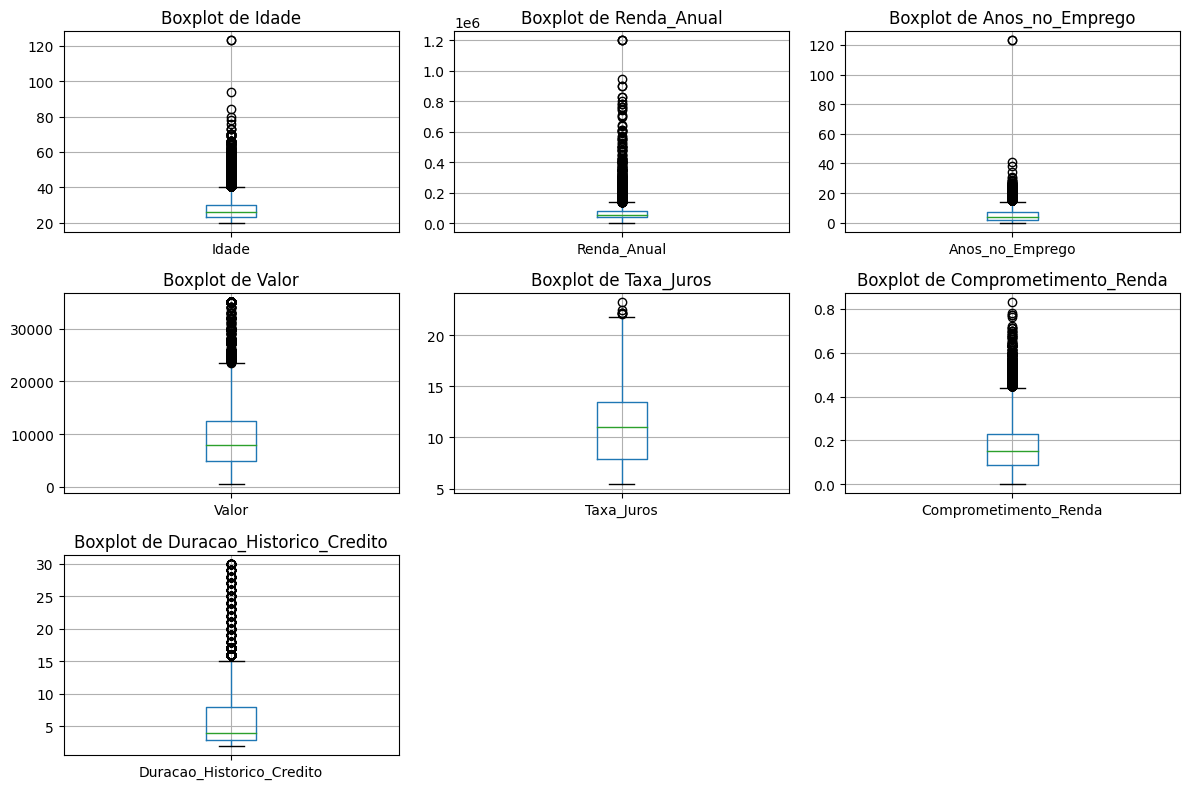

In [137]:
fig = plt.figure(figsize= (12,8))

# Loop pelas variáveis contínuas 
# for i, col in enumerate(variaveis_numericas):
#  plt.subplot(3, 3, i + 1);
#  df.boxplot(df_sem_outliers[col])
#  plt.tight_layout()

for i, col in enumerate(variaveis_numericas):
    plt.subplot(3, 3, i + 1)
    df_teste2_sem_outliers_IDADE.boxplot(column=col)  # Gerando boxplot para cada coluna
    plt.title(f'Boxplot de {col}')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de gráficos
plt.show()

In [107]:
# Detecanto outliers e retirando-os

for variavel in variaveis_numericas:
 outlier = detecta_outliers(df,variavel)
 print(f"\nQuantidade de Outliers presentes em {variavel} é de: {outlier.shape}\n")


Quantidade de Outliers presentes em Idade é de: (1460, 12)


Quantidade de Outliers presentes em Renda_Anual é de: (1464, 12)


Quantidade de Outliers presentes em Anos_no_Emprego é de: (853, 12)


Quantidade de Outliers presentes em Valor é de: (1636, 12)


Quantidade de Outliers presentes em Taxa_Juros é de: (0, 12)


Quantidade de Outliers presentes em Comprometimento_Renda é de: (615, 12)


Quantidade de Outliers presentes em Duracao_Historico_Credito é de: (1116, 12)



In [111]:
# Verificando como ficaria novo DF com todas essas retiradas
df_sem_outliers = df.copy()

for variavel in variaveis_numericas:
 outlier = detecta_outliers(df_sem_outliers,variavel)

 df_sem_outliers = df_sem_outliers.merge(outlier, how='left', indicator=True)
 df_sem_outliers = df_sem_outliers[df_sem_outliers['_merge'] == 'left_only'].drop(columns=['_merge'])

 print(f"\nQuantidade de Outliers presentes em {variavel} é de: {outlier.shape}\n")


Quantidade de Outliers presentes em Idade é de: (1460, 12)


Quantidade de Outliers presentes em Renda_Anual é de: (1337, 12)


Quantidade de Outliers presentes em Anos_no_Emprego é de: (620, 12)


Quantidade de Outliers presentes em Valor é de: (1229, 12)


Quantidade de Outliers presentes em Taxa_Juros é de: (0, 12)


Quantidade de Outliers presentes em Comprometimento_Renda é de: (682, 12)


Quantidade de Outliers presentes em Duracao_Historico_Credito é de: (840, 12)



In [112]:
df_sem_outliers

,Idade,Renda_Anual,Tipo_Moradia,Anos_no_Emprego,Motivo_Emprestimo,Grau_Emprestimo,Valor,Taxa_Juros,Status_Pagamento,Comprometimento_Renda,Inadimplencia_Historica,Duracao_Historico_Credito
0,21.0,9600.0,Próprio,5.0,Educação,B,1000.0,11.14,0,0.10,Não,2.0
1,21.0,9900.0,Próprio,2.0,Empreendimento,A,2500.0,7.14,1,0.25,Não,2.0
2,21.0,10000.0,Próprio,6.0,Empreendimento,D,1600.0,14.74,1,0.16,Não,3.0
3,24.0,10800.0,Hipoteca,8.0,Educação,B,1750.0,10.99,1,0.16,Não,2.0
4,24.0,10980.0,Próprio,0.0,Pessoal,A,1500.0,7.29,0,0.14,Não,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26344,38.0,36000.0,Hipoteca,3.0,Reformas Domésticas,C,6000.0,13.99,0,0.17,Sim,12.0
26348,38.0,59475.0,Hipoteca,10.0,Médico,D,18125.0,14.84,1,0.26,Sim,13.0
26350,38.0,67870.0,Hipoteca,6.0,Médico,B,5000.0,NaN,0,0.07,Não,13.0
26355,37.0,21600.0,Aluguel,4.0,Médico,D,3800.0,NaN,1,0.18,Não,11.0


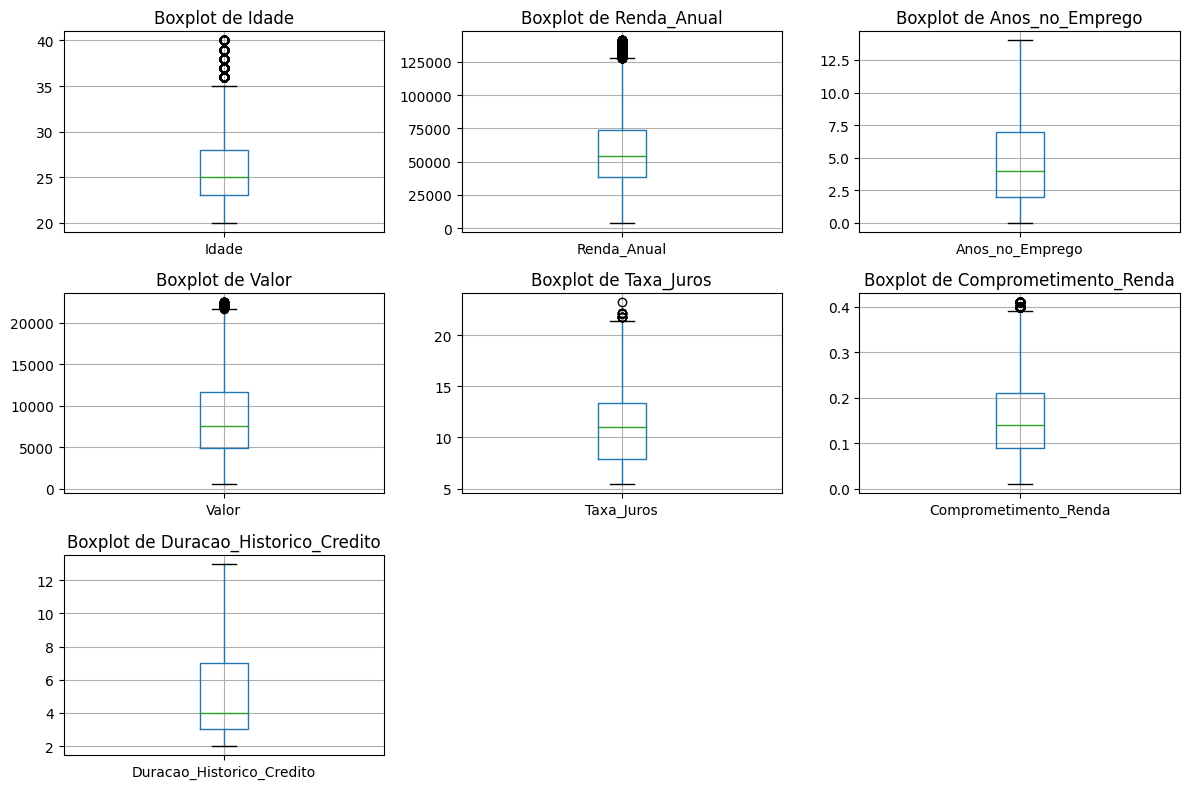

In [116]:
fig = plt.figure(figsize= (12,8))

# Loop pelas variáveis contínuas 
# for i, col in enumerate(variaveis_numericas):
#  plt.subplot(3, 3, i + 1);
#  df.boxplot(df_sem_outliers[col])
#  plt.tight_layout()

for i, col in enumerate(variaveis_numericas):
    plt.subplot(3, 3, i + 1)
    df_sem_outliers.boxplot(column=col)  # Gerando boxplot para cada coluna
    plt.title(f'Boxplot de {col}')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de gráficos
plt.show()

In [117]:
# verificando as quantidades de outliers que ainda estão no DF
for variavel in variaveis_numericas:
 outlier = detecta_outliers(df_sem_outliers,variavel)
 print(f"\nQuantidade de Outliers presentes em {variavel} é de: {outlier.shape}\n")


Quantidade de Outliers presentes em Idade é de: (628, 12)


Quantidade de Outliers presentes em Renda_Anual é de: (413, 12)


Quantidade de Outliers presentes em Anos_no_Emprego é de: (0, 12)


Quantidade de Outliers presentes em Valor é de: (87, 12)


Quantidade de Outliers presentes em Taxa_Juros é de: (0, 12)


Quantidade de Outliers presentes em Comprometimento_Renda é de: (232, 12)


Quantidade de Outliers presentes em Duracao_Historico_Credito é de: (0, 12)



<font color = "red">Verificando as variáveis NA

In [97]:
# Verificando existência de valores NA nas variaveis Tx juros e ano emprego
df[df['Anos_no_Emprego'].isna()]

,Idade,Renda_Anual,Tipo_Moradia,Anos_no_Emprego,Motivo_Emprestimo,Grau_Emprestimo,Valor,Taxa_Juros,Status_Pagamento,Comprometimento_Renda,Inadimplencia_Historica,Duracao_Historico_Credito
105,22.0,12600.0,Hipoteca,NaN,Pessoal,A,2000.0,5.42,1,0.16,Não,4.0
222,24.0,185000.0,Hipoteca,NaN,Educação,B,35000.0,12.42,0,0.19,Não,2.0
379,24.0,16800.0,Hipoteca,NaN,Consolidação Dívidas,A,3900.0,NaN,1,0.23,Não,3.0
407,25.0,52000.0,Aluguel,NaN,Pessoal,B,24000.0,10.74,1,0.46,Não,2.0
408,22.0,17352.0,Hipoteca,NaN,Educação,C,2250.0,15.27,0,0.13,Sim,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38.0,12000.0,Próprio,NaN,Educação,A,4800.0,7.29,1,0.40,Não,12.0
32328,51.0,18408.0,Aluguel,NaN,Pessoal,C,1000.0,14.65,1,0.05,Sim,20.0
32360,70.0,39996.0,Aluguel,NaN,Médico,C,3600.0,15.23,0,0.09,Sim,19.0
32453,56.0,32400.0,Aluguel,NaN,Médico,A,8575.0,7.51,0,0.26,Não,18.0


In [43]:
# Com base no gráfico acima, podemos ver que a massa de pessoas possuem entre 0 a 15 anos
df[df['Anos_no_Emprego']>15.0]

,Idade,Renda_Anual,Tipo_Moradia,Anos_no_Emprego,Motivo_Emprestimo,Grau_Emprestimo,Valor,Taxa_Juros,Status_Pagamento,Comprometimento_Renda,Inadimplencia_Historica,Duracao_Historico_Credito
0,22.0,59000.0,Aluguel,123.0,Pessoal,D,35000.0,16.02,1,0.59,Sim,3.0
210,21.0,192000.0,Hipoteca,123.0,Empreendimento,A,20000.0,6.54,0,0.10,Não,4.0
17834,34.0,948000.0,Hipoteca,18.0,Pessoal,B,2000.0,9.99,0,0.00,Não,7.0
17847,35.0,500000.0,Hipoteca,17.0,Consolidação Dívidas,C,20000.0,13.85,0,0.04,Sim,7.0
17850,34.0,120000.0,Aluguel,17.0,Empreendimento,B,35000.0,10.59,0,0.29,Não,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
32516,52.0,29000.0,Próprio,23.0,Pessoal,A,7000.0,7.49,0,0.24,Não,20.0
32519,51.0,115900.0,Hipoteca,16.0,Pessoal,A,12000.0,7.88,0,0.10,Não,29.0
32534,76.0,75000.0,Aluguel,23.0,Médico,A,15000.0,8.94,0,0.20,Não,25.0
32539,61.0,148000.0,Hipoteca,30.0,Consolidação Dívidas,B,24000.0,10.38,1,0.16,Não,20.0
